In [1]:
# Importing relevant libraries

import pandas as pd
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('ggplot')
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # Adjusts the configuration of the plots that we create

In [2]:
# Reading the data
movies = pd.read_csv('/Users/geett/Desktop/Databases/Python Project/movies.csv')

In [3]:
# Printing first 5 rows
movies.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
# Printing last 5 rows
movies.tail()

name rating   genre  year                          released  \
7663   More to Life    NaN   Drama  2020  October 23, 2020 (United States)   
7664    Dream Round    NaN  Comedy  2020  February 7, 2020 (United States)   
7665  Saving Mbango    NaN   Drama  2020         April 27, 2020 (Cameroon)   
7666   It's Just Us    NaN   Drama  2020   October 1, 2020 (United States)   
7667      Tee em el    NaN  Horror  2020   August 19, 2020 (United States)   

      score  votes       director         writer              star  \
7663    3.1   18.0  Joseph Ebanks  Joseph Ebanks      Shannon Bond   
7664    4.7   36.0   Dusty Dukatz    Lisa Huston  Michael Saquella   
7665    5.7   29.0   Nkanya Nkwai   Lynno Lovert      Onyama Laura   
7666    NaN    NaN  James Randall  James Randall     Christina Roz   
7667    5.7    7.0   Pereko Mosia   Pereko Mosia  Siyabonga Mabaso   

            country   budget  gross                    company  runtime  
7663  United States   7000.0    NaN                        NaN     90.0  
7664  United States      NaN    NaN  Cactus Blue Entertainment     90.0  
7665  United States  58750.0    NaN           Embi Productions      NaN  
7666  United States  15000.0    NaN                        NaN    120.0  
7667   South Africa      NaN    NaN                PK 65 Films    102.0

In [5]:
# Printing the shape of movies dataframe
movies.shape

(7668, 15)

In [6]:
# Checking columns info
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
# Checking for missing values
missing_values = movies.isnull().sum() / movies.shape[0] * 100
print("Percentage of missing values \n")
print(missing_values)

Percentage of missing values 

name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64


In [8]:
# Subset of columns with less than 3 percent missing values
subset_null = missing_values[missing_values < 3].index.to_list()

# Removing rows with null values except budget column
movies.dropna(subset = subset_null, inplace=True)

In [9]:
# Checking for missing values
print("Percentage of missing values \n")
print(movies.isnull().sum() / movies.shape[0]  * 100)

Percentage of missing values 

name         0.000000
rating       0.000000
genre        0.000000
year         0.000000
released     0.000000
score        0.000000
votes        0.000000
director     0.000000
writer       0.000000
star         0.000000
country      0.000000
budget      26.861846
gross        0.000000
company      0.000000
runtime      0.000000
dtype: float64


We are going to fill missing values in the budget column. We are going to make groups of movies released in 1980s, 1990s, 2000s, 2010s and 2020s.
But before making groups, we can see that year information is provided in two columns: year and released. We are going to investigate whether year has correct year from released column exact date of release.

In [10]:
# Checking year and released columns
movies[['year', 'released']].head(20)

year                            released
0   1980       June 13, 1980 (United States)
1   1980        July 2, 1980 (United States)
2   1980       June 20, 1980 (United States)
3   1980        July 2, 1980 (United States)
4   1980       July 25, 1980 (United States)
5   1980         May 9, 1980 (United States)
6   1980       June 20, 1980 (United States)
7   1980   December 19, 1980 (United States)
8   1980       June 19, 1981 (United States)
9   1980        May 16, 1980 (United States)
10  1980   December 17, 1980 (United States)
11  1980    October 26, 1984 (United States)
12  1980   December 12, 1980 (United States)
13  1980  September 19, 1980 (United States)
14  1980       July 25, 1980 (United States)
15  1980     October 3, 1980 (United States)
16  1980        May 16, 1980 (United States)
17  1980   December 19, 1980 (United States)
18  1980    February 8, 1980 (United States)
19  1980   December 12, 1980 (United States)

We can see two instances in first 20 rows that year column with index 8 and 11 has wrong information. Therefore we are going to extract correct year of release from released column.

In [11]:
# Extracting correct year
correct_year = movies['released'].str.extract(r'(?:\w.+)?(\d{4})\s\([\w\s]+\)')

# Checking the result
print(correct_year.head())

# Adding new column to the dataframe
movies['correct_year'] = correct_year.astype(int)

      0
0  1980
1  1980
2  1980
3  1980
4  1980


We are now going to use correct_year column and country column to fill missing values. This is the process we are going to follow:

1. First, we will assign group labels to each year group. For example: year-1981, group-1980s and year-2016, group-2010s
2. These labels will help us make groups and calculate mean for each country and genre combination.
3. We will fill missing values in each of these groups with mean of what we found earlier.

In [12]:
# Assigning labels to each bin based on year groups
bins = [1980, 1990, 2000, 2010, 2020]
labels = ['1980+', '1990+', '2000+', '2010+']
movies['year_bins'] = pd.cut(movies['correct_year'], bins=bins, labels=labels, include_lowest=True)

In [13]:
# Filling values for each country and genre group
for year_group in movies['year_bins'].unique():
    
    df = movies[movies['year_bins'] == year_group]    # rows with selected year bin
    
    value_df = df.groupby(['country', 'genre']).agg({'budget': 'mean'}).reset_index()  # rows with fill values
    
    null_df = df[df['budget'].isnull()]    # rows where missing values are present
    
    budget_fill_values = []
    indices = []
    for i, v in null_df.iterrows():
        for i2, v2 in value_df.iterrows():
            if v['country'] == v2['country'] and v['genre'] == v2['genre']:
                movies.loc[i, 'budget'] = v2['budget']

In [14]:
# Checking for missing values after above loop incorporated
print("Percentage of missing values \n")
print(movies.isnull().sum() / movies.shape[0]  * 100)

Percentage of missing values 

name            0.000000
rating          0.000000
genre           0.000000
year            0.000000
released        0.000000
score           0.000000
votes           0.000000
director        0.000000
writer          0.000000
star            0.000000
country         0.000000
budget          3.237992
gross           0.000000
company         0.000000
runtime         0.000000
correct_year    0.000000
year_bins       0.000000
dtype: float64


We still can see some missing values in the budget column. These may lie outside of any of those country, genre combination. We will fill those missing values with the respective group's average budget value.

In [15]:
# Filling rest of the missing values
for year_group in movies['year_bins'].unique():
    
    value = movies[movies['year_bins'] == year_group]['budget'].mean()
    indices = movies[(movies['year_bins'] == year_group) & (movies['budget'].isnull())].index
    
    for i in indices:
        movies.loc[i, 'budget'] = value

We are going to remove the decimal from votes, budget, gross and runtime columns.

In [16]:
# Running a loop to change the datatype of required columns

for column in ['votes', 'budget', 'gross', 'runtime']:
    movies[column] = movies[column].astype('int64')
    print('{} column datatype has been changed to {}'.format(column, movies[column].dtype))

votes column datatype has been changed to int64
budget column datatype has been changed to int64
gross column datatype has been changed to int64
runtime column datatype has been changed to int64


In [17]:
# Checking the updates made
movies.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  correct_year year_bins  
0   46998772        Warner Bros.      146          1980     1980+  
1   58853106   Columbia Pictures      104          1980     1980+  
2  538375067           Lucasfilm      124          1980     1980+  
3   83453539  Paramount Pictures       88          1980     1980+  
4   39846344      Orion Pictures       98          1980     1980+

In [18]:
# Removing year and year_bins as they are redundant now.
movies.drop(['year', 'year_bins'], axis=1, inplace=True)

In [19]:
# Dropping duplicates
movies.duplicated().sum()

0

In [20]:
# Setting display option
pd.set_option('display.max_rows', None)

In [21]:
# Sorting dataframe
movies.sort_values('gross', ascending=False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

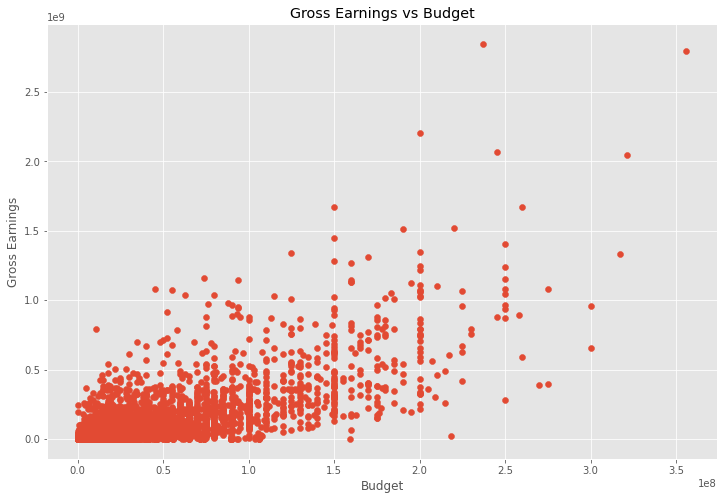

In [22]:
# Scatter plot with budget and gross
plt.scatter(x=movies['budget'], y=movies['gross'])
plt.title('Gross Earnings vs Budget')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

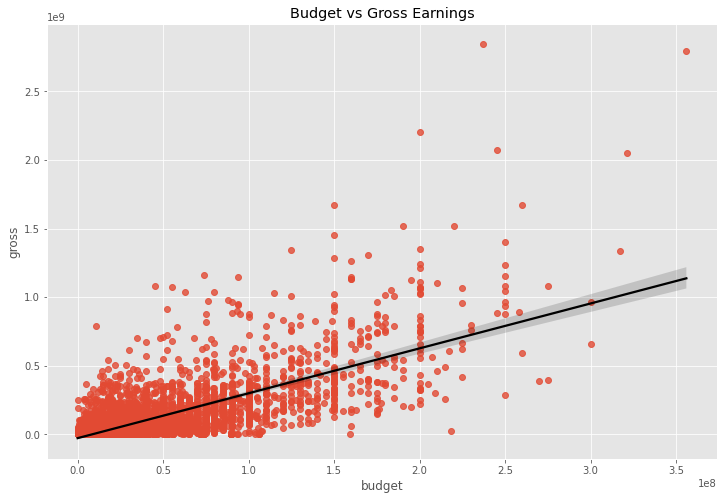

In [23]:
# Regplot with budget and gross
sns.regplot(x='budget', y='gross', data=movies, line_kws={"color": "black"})
plt.title('Budget vs Gross Earnings')
plt.show()

In [24]:
# Looking at correlation
movies.corr()

score     votes    budget     gross   runtime  correct_year
score         1.000000  0.415190  0.065364  0.188071  0.397226      0.101308
votes         0.415190  1.000000  0.447056  0.631110  0.309945      0.214533
budget        0.065364  0.447056  1.000000  0.726642  0.274095      0.331309
gross         0.188071  0.631110  0.726642  1.000000  0.245117      0.251873
runtime       0.397226  0.309945  0.274095  0.245117  1.000000      0.113909
correct_year  0.101308  0.214533  0.331309  0.251873  0.113909      1.000000

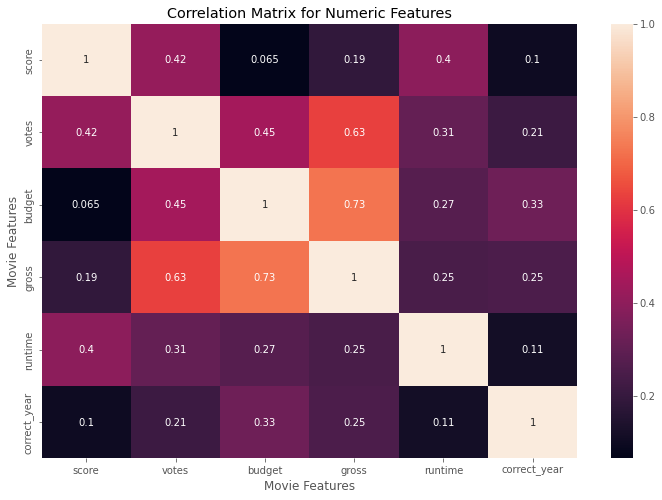

In [25]:
# Plotting a heatmap for correlation
correlation_matrix = movies.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [26]:
# Looking at company
# Creating a new numerized dataframe
movies_numerized = movies.copy()

for col in movies_numerized.columns:
    if movies_numerized[col].dtype == 'object':
        movies_numerized[col] = movies_numerized[col].astype('category')
        movies_numerized[col] = movies_numerized[col].cat.codes

In [27]:
# Printing the numerized dataframe
movies_numerized.head()

name  rating  genre  released  score    votes  director  writer  star  \
0  6372       6      6      1654    8.4   927000      2471    3851   979   
1  5373       6      1      1445    5.8    65000      2169    1564   306   
2  4956       4      0      1718    8.7  1200000      1063    2464  1642   
3   277       4      4      1445    7.7   221000      1248    1920  2112   
4   993       6      4      1494    7.3   108000      1010     499   387   

   country    budget      gross  company  runtime  correct_year  
0       52  19000000   46998772     2179      146          1980  
1       53   4500000   58853106      686      104          1980  
2       53  18000000  538375067     1446      124          1980  
3       53   3500000   83453539     1697       88          1980  
4       53   6000000   39846344     1665       98          1980

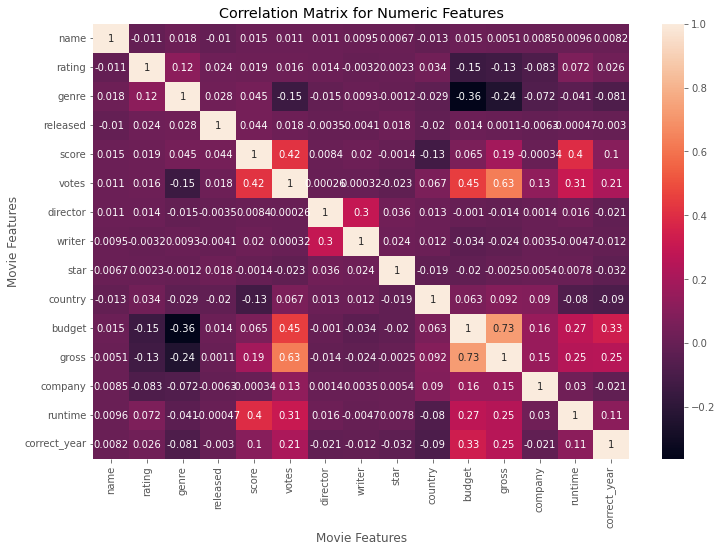

In [29]:
# Plotting a heatmap for correlation for numerized
correlation_matrix = movies_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [32]:
# Looking at correlation greater than 5
correlation_numerized = movies_numerized.corr()
corr_pairs = correlation_numerized.unstack().sort_values()
corr_pairs[corr_pairs > 0.5]

gross         votes           0.631110
votes         gross           0.631110
budget        gross           0.726642
gross         budget          0.726642
name          name            1.000000
writer        writer          1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
dtype: float64

High correlation can only be found in gross and budget and gross and votes feature pairs.